# banda base 
baseband systems, where signals are transmitted whitout any change in frequency or with only minor adjustements of the frequency range.
baseband transmition with pulse-shaping scheme
![baseband scheme](captura1.png)

### 1. Generate ramdom data or adquisition 


1. ramdom images

2. ramdom arrays
3. ramdom sounds
4. ramdom methods

How we can generate or adquisition data in python

In [ ]:
# ramdom images
from pylab import imshow, show, get_cmap
from numpy import random

Z = random.random((50,50))   # Test data

imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
show()

In [ ]:
from pylab import imshow, show, get_cmap
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randint
n = 5000
for i in range(n):
    seed(i)
    x = randint(255,size=(50, 50))
    #y = randint(0,100,500,size=(50, 50))

#Z = random.random((50,50))   # Test data

#imshow(x, cmap=get_cmap("Spectral"), interpolation='nearest')
x = randint(255,size=(50, 50))
imshow(x, cmap=get_cmap("YlGnBu"), interpolation='nearest')
show()

(array([  9.,   0.,   0.,   0.,   0., 158.,   0.,   0.,   0., 833.]),
 array([ 8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 10 Patch objects>)

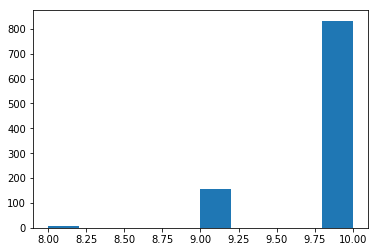

In [27]:
# Ramdom arrays
import numpy as np
import matplotlib.pyplot as plt
ngood, nbad, nsamp = 100, 2, 10
# number of good, number of bad, and number of samples
s = np.random.hypergeometric(ngood, nbad, nsamp, 1000)
plt.hist(s)

Text(0.5, 1.0, 'Spectrogram of Output ')

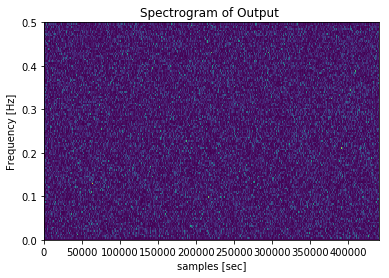

In [28]:
# Ramdom sound
import numpy as np 
from scipy.io.wavfile import write
from scipy import signal
noise = np.random.uniform(-1,1,441000)
#write('noise.wav',44100,noise)
write('noise.wav',44100,noise)
plt.figure()
f, t, S = signal.spectrogram(noise)
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('samples [sec]')
plt.title('Spectrogram of Output ')

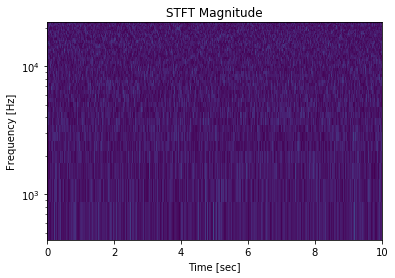

In [31]:
N = 10*44100
nperseg = 100
f, t, Zxx = signal.stft(noise, fs=44100, nperseg=nperseg)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1)
plt.ylim([f[1], f[-1]])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.show()

In [32]:
from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np 

In [33]:
def beat_freq(f1=220.0,f2=224.0):
    max_time=5
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times)+ np.sin(2*np.pi*f2*times)
    display(Audio(data=signal,rate=rate))
    return signal

In [34]:
v = interactive(beat_freq,f1=(200.0,300.0),f2=(200.0,300.0))
display(v)

interactive(children=(FloatSlider(value=220.0, description='f1', max=300.0, min=200.0), FloatSlider(value=224.…

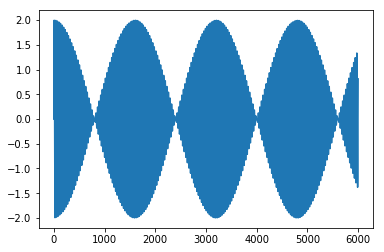

In [35]:
f1,f2 = v.children[:2]
f1.value =255
f2.value = 260
plt.plot(v.result[0:6000]);

### 2. FR cosino filter
digital finite response cosino filter

A raised cosine filter is a type of electronic filter, frequently used in telecommunications systems because it is able to minimize interference between symbols (ISI). It is called that because the non-zero part of the frequency spectrum is a cosine that, in its simplest form ( beta = 1), is 'raised' to position itself above the axis horizontal
\begin{equation}
h_N[k] = \begin{cases} 1 & \text{ for } f \ < 1-b/2t \\ 0.5 & \text{ for}(1-b)/2t<f<(1+b)/2t \\ 0&\text{otherwise}\end{cases}
\end{equation}

#### pulse features
1.  sobretencion up/down: Percentage of amplitude exceeding the level of 1 (upper overvoltage) or 0 (lower overvoltage).
2. Ascent / descent time: To obtain it, first the zero and logical levels are located, then the related time between 10% and 90% of the maximum pulse amplitude value (level of 1) is obtained. The time between both ranges is what is known as the rise time. In the same way, the lowering time is obtained, at the pulse lowering end.
3. Vamp: Pulse Amplitud width.
4. Vmax:  Maximun Amplitud.
5. Unit interval: time between two adjacent signal transitions.
![pulse feature](pulsefeatures.png)

In [36]:
def get_filter(name, T, rolloff=None):
    def rc(t, beta):
        import warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            return np.sinc(t)*np.cos(np.pi*beta*t)/(1-(2*beta*t)**2)
    def rrc(t, beta):
        return (np.sin(np.pi*t*(1-beta))+4*beta*t*np.cos(np.pi*t*(1+beta)))/(np.pi*t*(1-(4*beta*t)**2))
        
    # rolloff is ignored for triang and rect
    if name == 'rect':
        return lambda t: (abs(t/T)<0.5).astype(int)    
    if name == 'triang': 
        return lambda t: (1-abs(t/T)) * (abs(t/T)<1).astype(float)
    elif name == 'rc':
        return lambda t: rc(t/T, rolloff)
    elif name == 'rrc':
        return lambda t: rrc(t/T, rolloff)

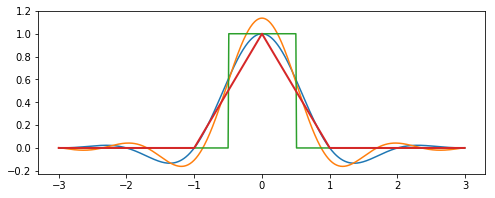

In [37]:
import matplotlib.pyplot as plt 
T = 1
Fs = 100
t = np.arange(-3*T, 3*T, 1/Fs)
g = get_filter('rc', T, rolloff=0.5)  # RC filter with rolloff alpha=0.5
plt.figure(figsize=(8,3))
plt.plot(t, get_filter('rc', T, rolloff=0.5)(t), label=r'Raised cosine $\alpha=0.5$')
plt.plot(t, get_filter('rrc', T, rolloff=0.5)(t), label=r'Root raised cosine $\alpha=0.5$')
plt.plot(t, get_filter('rect', T)(t), label=r'Rectangular')
plt.plot(t, get_filter('triang', T)(t), label=r'Triangular', lw=2)

In [38]:
b = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])
d = 2*b-1
print ("d=%s" % d)

d=[-1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1]


In [39]:
def get_signal(g, d):
    """Generate the transmit signal as sum(d[k]*g(t-kT))"""
    t = np.arange(-2*T, (len(d)+2)*T, 1/Fs)
    g0 = g(np.array([1e-8]))
    xt = sum(d[k]*g(t-k*T) for k in range(len(d)))
    return t, xt/g0

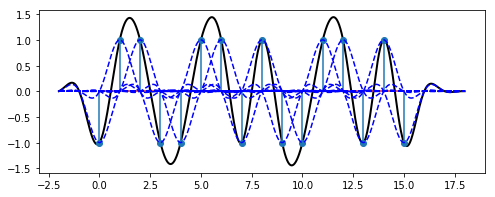

In [40]:
fig = plt.figure(figsize=(8,3))
t, xt = get_signal(g, d)
plt.plot(t, xt, 'k-', lw=2, label='$x(t)$')
plt.stem(T*np.arange(len(d)), d)
for k in range(len(d)):
        plt.plot(t, d[k]*g(t-k*T), 'b--', label='$d[k]g(t-kT)$')

### 3.eye diagram 
 
shows the superposition of the different congregations of ones and zeros in a given time or amount of bits determined

these combinations allow to know the characteristics of the pulses that travel through the channel


the graph is formed by superimposing the traces of the output of the receiver filter on an oscilloscope
![eyediagram](eyediagram.png)
## analysis
there are two types of posibles analitics 
1. pulse shape characteristics
2. comparison with a previous diagram

### pulse shape characteristics
1. Logic 1 level: Corresponds to the measurement of the average value of the level of a logical one. This is due to the fact that the eye diagram uses statistical methods in the construction of the pattern, that is, a histogram is generated with the different values of the pulse and then it is considered a reduced area of the pulse width, with which it is possible to obtain the average of level one of said pulse.
2. Logic level 0: Corresponds to the measurement of the average value of the logic level zero. As in the case of level one, the zero level measurement techniques are the same.
3. Amplitude crossing: refers to the level of voltage at which the opening of the eye occurs and its subsequent closure.
4. Time crossing: refers to the time in which the opening of the eye and its subsequent closure occurs.
5. Bit period: period between the opening and closing of the eye. It is obtained from the crossing of amplitude and the crossing of time.
6. Jitter: Corresponds basically to a phase deviation from the ideal position in time of a digital signal that propagates in a transmission channel. It is a completely undesirable effect in any communication system because it introduces a series of problems to the channel, which, if not treated properly, can completely degrade the quality and performance of the link.
### pulse shape characteristics

the preset diagrams establish specific regions in the diagram within which the pulses or waves cannot enter for optimal performance
![eyediagramregions](eyediagramregions.png)

###  signal properties analysis
In the presence of ISI(intersymbol interference), when the pulse does not meet the Nyquist criteria, the diagram will tend to close vertically. For a transmission without errors in the absence of noise, the eye must maintain a certain vertical opening (a), or otherwise there will be interference signals between symbols that will cause errors. When the eye is not fully closed, interference between symbols will reduce the value of the permissible additive noise. Therefore, the greater the vertical opening, the greater the immunity against noise. The optimal sampling time will be the point of maximum vertical opening of the eye, but this can never be achieved precisely by a practical synchronism recovery system. Therefore, the horizontal opening of the eye (b) is also important from a practical point of view. The higher the slope (c), the more sensitive the system will have to errors made in the recovery of synchronism (errors in the calculation of the sampling time).
![propiedadesseñal](propiedadesseñal.png)

In [41]:
def showEyeDiagramDrawing(xt, T, partInd):
    plt.subplot(211)
    plt.plot(t, xt, 'k-', lw=1, label='$x(t)$') # Plot the overall signal
    
    sigStart = 2*T*Fs  # ignore some transient effects at the beginning of the signal
    samples_perT = Fs*T
    samples_perWindow = 2*T*Fs
    # extract the part of the signal we use for the current part of the eye diagram
    sig_part = xt[sigStart + samples_perT*partInd + np.arange(samples_perWindow)]
    t_emphasize = np.arange(2*T+T*partInd, 2*T+T*partInd+2*T, 1/Fs) + t.min()
    # mark the part of the signal that currently contributes to the eye diagram
    plt.plot(t_emphasize, sig_part, 'b-', lw=2)   
    
    
    plt.subplot(235)
    t_part = np.arange(-T, T, 1/Fs)
    # draw all parts of the eye diagram from previous signal portions in black
    for p in range(partInd):
        plt.plot(t_part, xt[sigStart + samples_perT*p + np.arange(samples_perWindow)], 'k-')
    # draw the current part of the eye diagram in thick blue
    plt.plot(t_part, sig_part, 'b-', lw=2)

In [42]:
def drawFullEyeDiagram(xt):
    """Draw the eye diagram using all parts of the given signal xt"""
    samples_perT = Fs*T
    samples_perWindow = 2*Fs*T
    parts = []
    startInd = 2*samples_perT   # ignore some transient effects at beginning of signal
    
    for k in range(int(len(xt)/samples_perT) - 6):
        parts.append(xt[startInd + k*samples_perT + np.arange(samples_perWindow)])
    parts = np.array(parts).T
    
    t_part = np.arange(-T, T, 1/Fs)
    plt.plot(t_part, parts, 'b-')
    
def drawSignals(g, data=None):
    """Draw the transmit signal, the used filter and the resulting eye-diagram
    into one figure."""
    N = 100;
    if data is None:
        data = 2*((np.random.randn(N)>0))-1
        # fix the first 10 elements for  keeping the shown graphs constant
        # between eye diagrams
        data[0:10] = 2*np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])-1
    
    t, xt = get_signal(g, data)

    plt.subplot(223)
    t_g = np.arange(-4*T, 4*T, 1/Fs)
    plt.plot(t_g, g(t_g))

    
    plt.subplot(211)
    plt.plot(t, xt)
    plt.stem(data)
    
    plt.subplot(224)
    drawFullEyeDiagram(xt); plt.ylim((-2,2))
    plt.tight_layout()

In [43]:
def showRCEyeDiagram(alpha):
    g = get_filter('rc', T=1, rolloff=alpha)
    drawSignals(g)

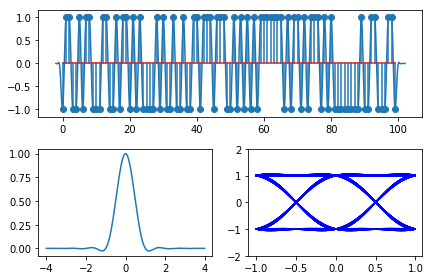

In [44]:
showRCEyeDiagram(alpha=1)

In [45]:
d = 2*np.array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]) - 1
print ("d=%s" % d)

d=[-1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1
  1 -1  1  1  1 -1  1]


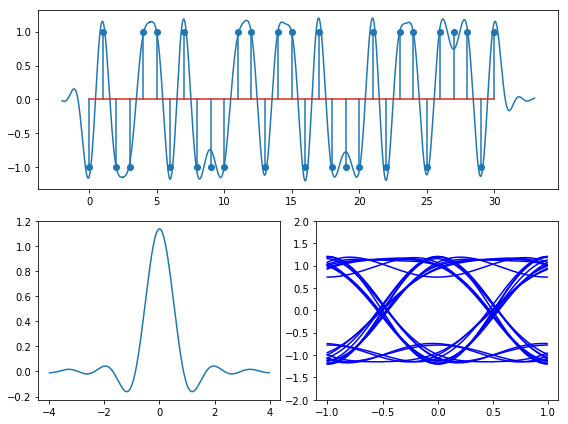

In [46]:
plt.figure(figsize=(8,6))
drawSignals(get_filter('rrc', T=1, rolloff=0.5), data=d)

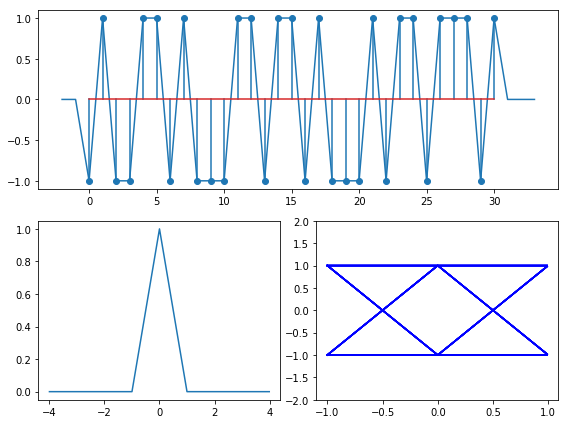

In [47]:
plt.figure(figsize=(8,6))
drawSignals(get_filter('triang', T=1), data=d)

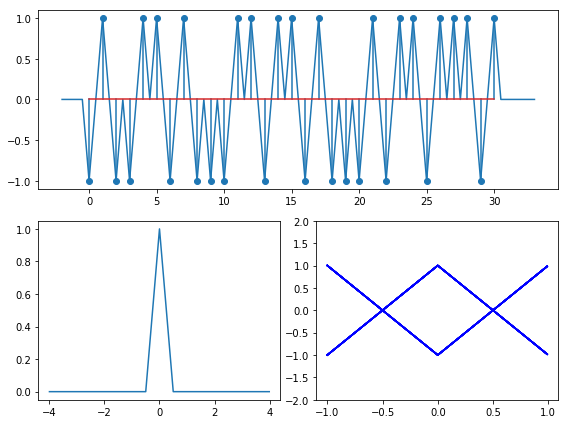

In [48]:
plt.figure(figsize=(8,6))
drawSignals(get_filter('triang', T=0.5, rolloff=0.5), data=d)

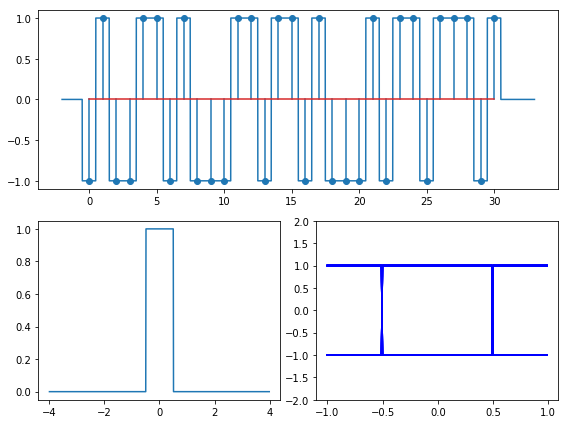

In [49]:
plt.figure(figsize=(8,6))
drawSignals(get_filter('rect', T=1, rolloff=0.5), data=d)

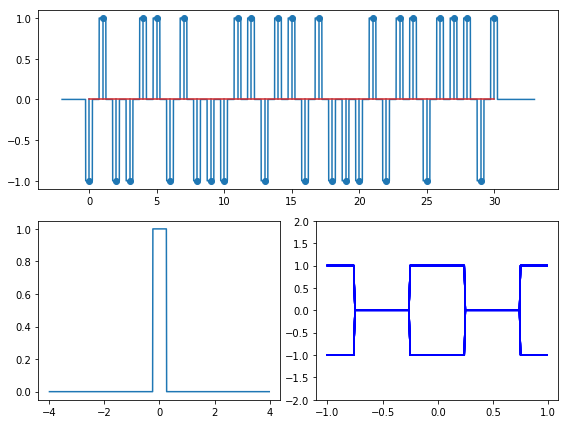

In [50]:
plt.figure(figsize=(8,6))
drawSignals(get_filter('rect', T=0.5, rolloff=0.5), data=d)

[ 3  1 -1 -1  1  3 -3  1  3  3]


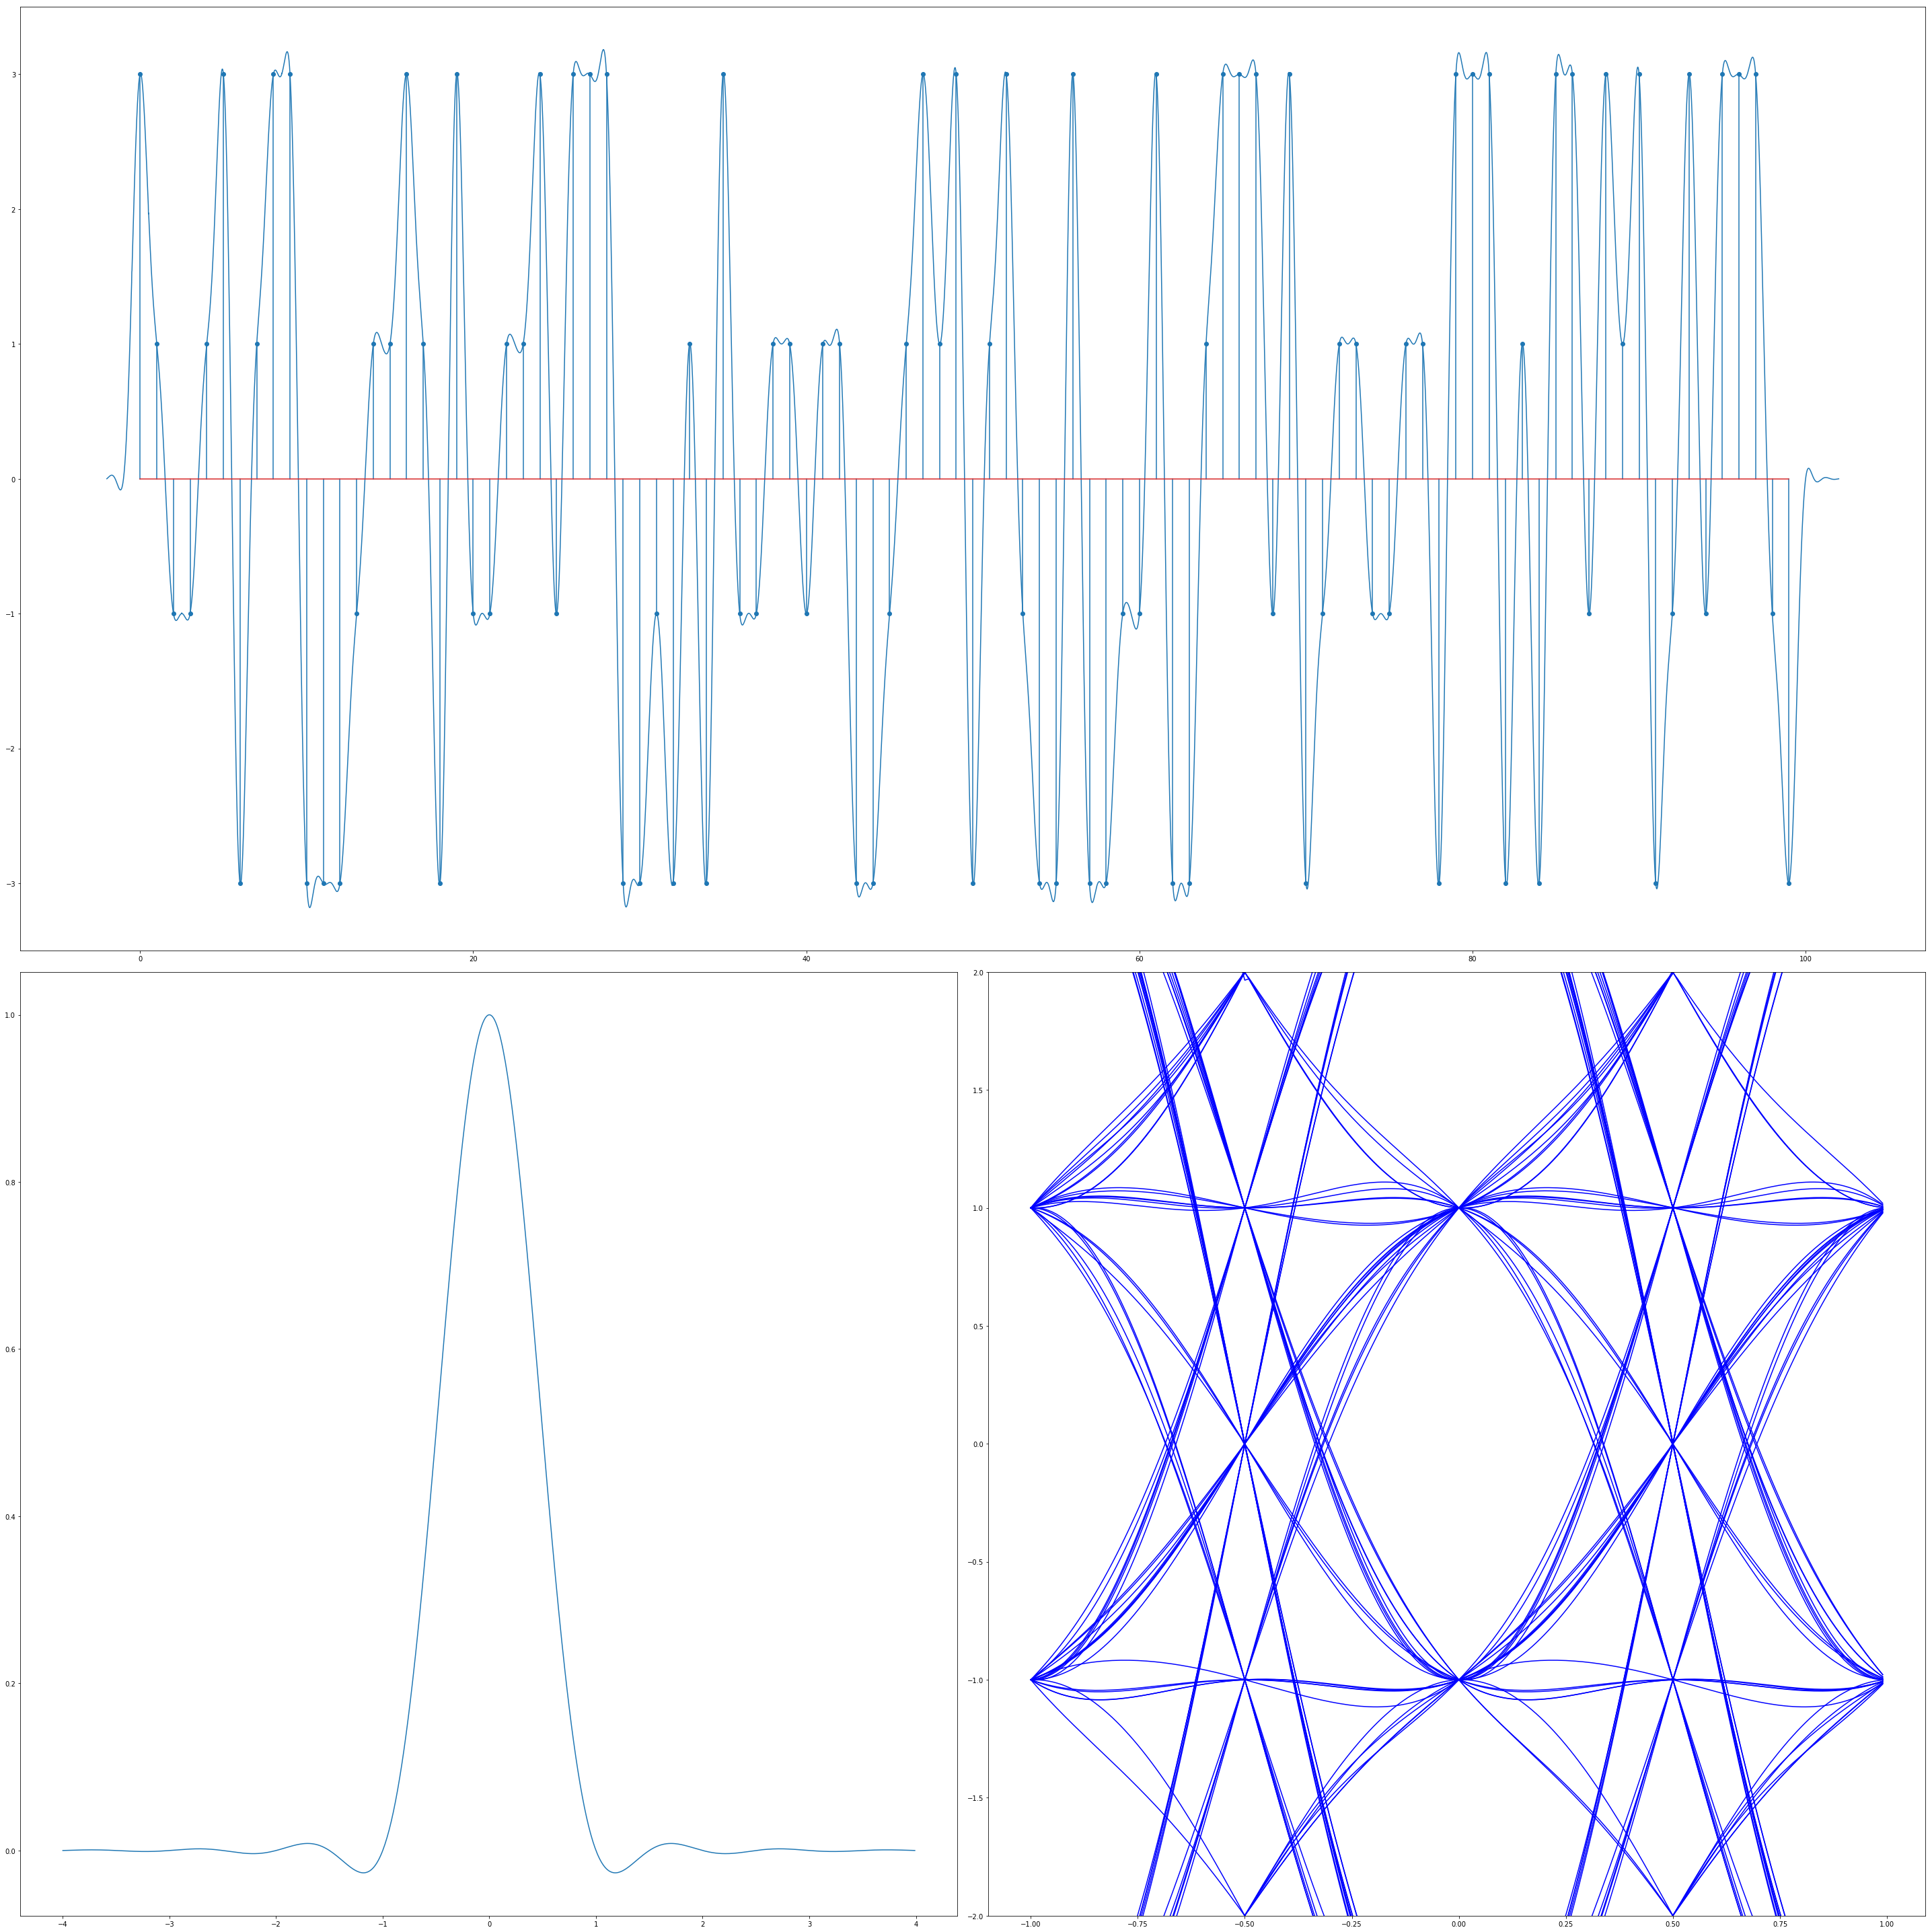

In [51]:
N = 100
plt.figure(figsize=(40,40))
data = 3-2*np.arange(4)[np.random.randint(4, size=N)]
#data = 3-2*np.arange(4)[np.random.randint(4)]
print (data[:10])
drawSignals(get_filter('rc', T=1, rolloff=1), data=data)

The cython version of the curve counter is not available.


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_color'

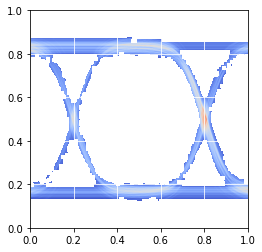

In [52]:
import numpy as np

use_fast = True
try:
    from brescount import bres_curve_count
except ImportError:
    print ("The cython version of the curve counter is not available.")
    use_fast = False


def bres_segment_count_slow(x0, y0, x1, y1, grid):
    """Bresenham's algorithm.

    The value of grid[x,y] is incremented for each x,y
    in the line from (x0,y0) up to but not including (x1, y1).
    """

    nrows, ncols = grid.shape

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)

    sx = 0
    if x0 < x1:
        sx = 1
    else:
        sx = -1
    sy = 0
    if y0 < y1:
        sy = 1
    else:
        sy = -1

    err = dx - dy

    while True:
        # Note: this test is moved before setting
        # the value, so we don't set the last point.
        if x0 == x1 and y0 == y1:
            break

        if 0 <= x0 < nrows and 0 <= y0 < ncols:
            grid[x0, y0] += 1

        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

def bres_curve_count_slow(x, y, grid):
    for k in range(x.size - 1):
        x0 = x[k]
        y0 = y[k]
        x1 = x[k+1]
        y1 = y[k+1]
        bres_segment_count_slow(x0, y0, x1, y1, grid)


def random_trace(t):
    s = 2*(np.random.randint(0, 5) % 2) - 1
    r = 0.01 * np.random.randn()
    s += r
    a = 2.0 + 0.001 * np.random.randn()
    q = 2*(np.random.randint(0, 7) % 2) - 1
    t2 = t + q*(6 + 0.01*np.random.randn())
    t2 += 0.05*np.random.randn()*t
    y = a * (np.exp(s*t2) / (1 + np.exp(s*t2)) - 0.5) + 0.07*np.random.randn()
    return y


if __name__ == "__main__":
    import matplotlib.pyplot as plt
    grid_size = 600
    grid = np.zeros((grid_size, grid_size), dtype=np.int32)

    tmin = -10.0
    tmax = 10.0
    n = 81
    t = np.linspace(tmin, tmax, n)
    dt = (tmax - tmin) / (n - 1)

    ymin = -1.5
    ymax = 1.5

    num_traces = 1000

    for k in range(num_traces):

        # Add some noise to the times at which the signal
        # will be sampled.  Without this, all the samples occur
        # at the same times, and this produces an aliasing
        # effect in the resulting bin counts.
        # If n == grid_size, this can be dropped, and t2 = t
        # can be used instead. (Or, implement an antialiased
        # version of bres_curve_count.)
        steps = dt + np.sqrt(0.01 * dt) * np.random.randn(n)
        steps[0] = 0
        steps_sum = steps.cumsum()
        t2 = tmin + (tmax - tmin) * steps_sum / steps_sum[-1]

        td = (((t2 - tmin) / (tmax - tmin)) * grid_size).astype(np.int32)

        y = random_trace(t2)

        # Convert y to integers in the range [0,grid_size).
        yd = (((y - ymin) / (ymax - ymin)) * grid_size).astype(np.int32)

        if use_fast:
            bres_curve_count(td, yd, grid)
        else:
            bres_curve_count_slow(td, yd, grid)

    plt.figure()
    # Convert to float32 so we can use nan instead of 0.
    grid = grid.astype(np.float32)
    grid[grid==0] = np.nan
    plt.grid(color='w')
    plt.imshow(grid.T[::-1,:], extent=[0,1,0,1], cmap=plt.cm.coolwarm,
               interpolation='gaussian')
    ax = plt.gca()
    #ax.set_axis_bgcolor('k')
    ax.set_axis_color('k')
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_yticks(np.linspace(0,1,11))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.colorbar()
    fig = plt.gcf()

    #plt.savefig("eye-diagram.png", bbox_inches='tight')
    plt.show()

# Band Pass 
## change central frequency
In telecommunications, a broadband signalling method is one that handles a wide band of frequencies. "Broadband" is a relative term, understood according to its context. The wider (or broader) the bandwidth of a channel, the greater the data-carrying capacity, given the same channel quality.

In radio, for example, a very narrow band will carry Morse code, a broader band will carry speech, and a still broader band will carry music without losing the high audio frequencies required for realistic sound reproduction. This broad band is often divided into channels or "frequency bins" using passband techniques to allow frequency-division multiplexing instead of sending a higher-quality signal.

In [55]:
%pylab inline
import sk_dsp_comm.sigsys as ss
#import scikit_dsp_comm as ss
import scipy.signal as signal
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


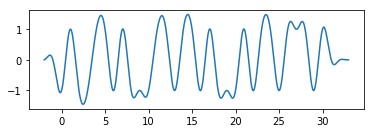

In [56]:
t1, xt = get_signal(g, d)
plt.subplot(211)
plt.plot(t1, xt)
#plt.stem(d)

Text(0.5, 1.0, 'FFT Real Eventos Derechos S_1')

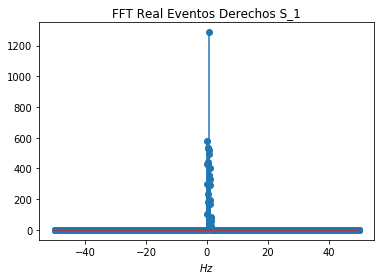

In [57]:
F = abs(np.fft.rfft(xt))
f = np.fft.rfft(xt)
sample_rate = 100
freq = np.fft.fftfreq(1751, d=1./sample_rate)
plt.stem(freq,F)
plt.xlabel(r'$Hz$')
plt.title('FFT Real Eventos Derechos S_1')

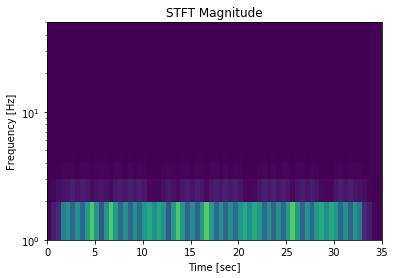

In [58]:
N = 10*Fs
nperseg = 100
f, t, Zxx = signal.stft(xt, fs=Fs, nperseg=nperseg)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1)
plt.ylim([f[1], f[-1]])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.show()

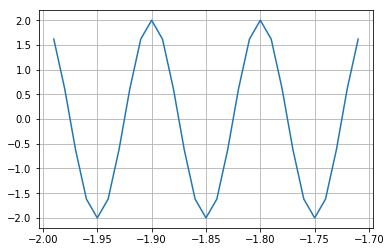

In [59]:
P =2*np.cos(2*pi*t1*10)
plot(t1[1:30],P[1:30])
grid()

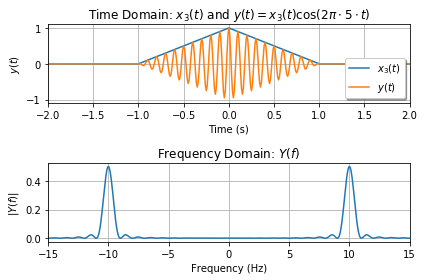

In [60]:
fs = 100 # sampling rate in Hz
tau = 1
t = arange(-5,5,1/fs)
x3 = ss.tri(t,tau)
y = x3*np.cos(2*pi*10*t)
subplot(211)
plot(t,x3)
plot(t,y)
grid()
ylim([-1.1,1.1])
xlim([-2,2])
legend((r'$x_3(t)$', r'$y(t)$'),loc='lower right',shadow=True)
title(r'Time Domain: $x_3(t)$ and $y(t)=x_3(t)\cos(2\pi\cdot 5\cdot t)$')
xlabel(r'Time (s)')
ylabel(r'$y(t)$');
f,Y = ss.ft_approx(y,t,4096)
subplot(212)
plot(f,abs(Y))
#plot(f,angle(X0))
grid()
title(r'Frequency Domain: $Y(f)$')
xlim([-15,15])
xlabel(r'Frequency (Hz)')
ylabel(r'$|Y(f)|$');
tight_layout()

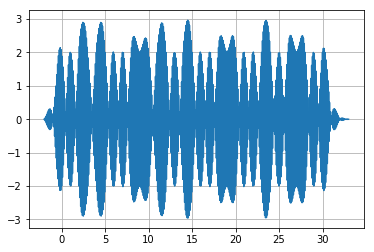

In [61]:
y1=xt*P
plot(t1,y1)
#plot(t,y)
grid()

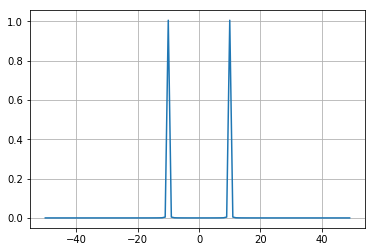

In [62]:
#f,Y = ss.ft_approx(y,t,4096)
f1,Y1 = ss.ft_approx(y1,t1,100)
plot(f1,abs(Y1))
#plot(f,angle(X0))
grid()

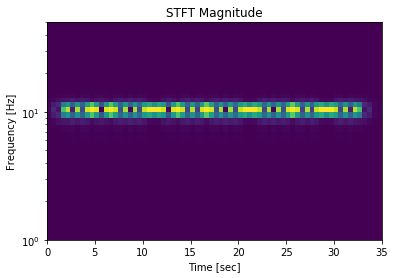

In [63]:
N = 10*Fs
nperseg = 100
f, t, Zxx = signal.stft(y1, fs=Fs, nperseg=nperseg)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1)
plt.ylim([f[1], f[-1]])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.show()

# Quadrature modulator
![baseband scheme](quadraturemodulator.png)

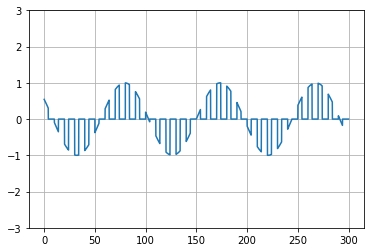

In [64]:
import numpy as np
import matplotlib.pyplot as plt

percent=40.0
TimePeriod=10.0
Cycles=30
dt=0.01

t=np.arange(0,Cycles*TimePeriod,dt); 
pwm= (t%TimePeriod) < (TimePeriod*percent/100)

x=np.linspace(-10,10,len(pwm))
y=(np.sin(x))

y[pwm == 0] = 0

plt.plot(t,y)

plt.ylim([-3,3])
plt.grid()
plt.show() 

Enter the amplitude = 3
Enter the frequency  = 3


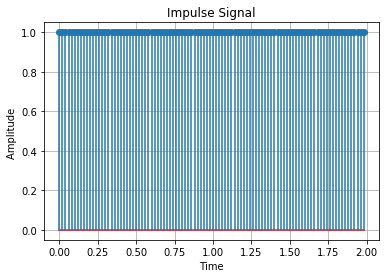

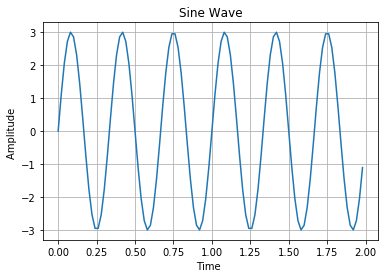

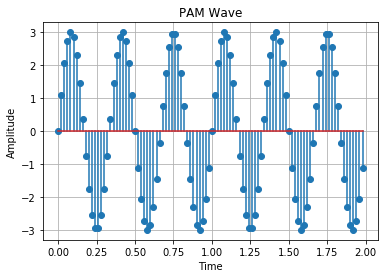

In [65]:
import matplotlib.pylab as plt
import numpy as num

a = int(input('Enter the amplitude = '))
f = int(input('Enter the frequency  = '))

t = num.arange(0,2,0.02) # for a total of 16 samples
# %generation of an impulse signal
x1=[]
for i in range(len(t)):
    x1.append(1)
x2 = a*num.sin(2*num.pi*f*t)# %generation of sine wave
y = x1*x2; #modulation step
    
#for impulse signal plot
plt.stem(t,x1);
plt.title('Impulse Signal');
plt.xlabel('Time');
plt.ylabel('Amplitude ');
plt.grid(True)
plt.show()

#for sine wave plot
plt.plot(t,x2); 
plt.title('Sine Wave');
plt.xlabel('Time ');
plt.ylabel('Amplitude ');
plt.grid(True)
plt.show()

#for PAM wave plot
plt.stem(t,y);
plt.title('PAM Wave');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.grid(True)
plt.show()

# another way to generate a PAM

In [68]:
import numpy as np
from sympy.combinatorics.graycode import GrayCode

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import Markdown, HTML

font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

# Simulation Parameters
Sample Rate and Sample Period used for simulation

In [69]:
f_sim = 1
T_sim = 1/f_sim
M = 2

Number of Bits generated by the binary source

In [70]:
N_bits  = 20

# Modulation Parameters
Number of bits per Symbol

In [71]:
M = 2

Symbol duration and symbol rate

In [72]:
T_s = 10*T_sim
f_s = 1/T_s

Number of symbols necessary for the defined M

In [73]:
K = 2**M

In [74]:
b = np.array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])
#b = np.random.randint(0,2,N_bits)
display(b)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

#Symbol Mapping
Define a function which maps 1D array b using M bits per symbol to a Gray code. The Gray code for a given number M of bits can be obtained from the class GrayCode of sympy.combinatorics.graycode. To map the array b of bits to the gray code symbols, first the array reshaped into a $len(b)/M \times M$ matrix, and then for each row (resulting symbol) of the matrix, the corresponding unsigned integer number representation is calculated by multiplying $2^{(M-1-l)}$ to column $l$ and then summing over the columns. Those integer numbers can then be used to index into the Gray code list.

In [80]:
def gray_code_mapper(b, M):
    b = np.asarray(b)
    # gray code list
    code_mapper = GrayCode(M)
    # generate list of gray codes for provided number of bits M
    gray_code_list = np.array(list(code_mapper.generate_gray()))
    # compute the index into gray code list
    gray_index = np.sum(b.reshape(-1,M)*2**np.tile(np.arange(M-1,-1,-1),(b.reshape(-1,M).shape[0],1)), axis=1)
    # compute gray code represenation
    if not gray_index.size == 0:
        output_gray = gray_code_list[gray_index]
    else:
        output_gray = []
    return output_gray, gray_code_list

In [76]:
_, gray_code = gray_code_mapper([], M)
display(gray_code.tolist())

['00', '01', '11', '10']

In [77]:
def symbol_mapper_mpam(b, M):
    # symbols table
    table_symbols = np.arange(0, 2**M) - 2**(M-1) + 0.5
    # compute index into symbol table
    idx_symbols_table = [int(b,2) for b in b]
    return table_symbols[idx_symbols_table], table_symbols

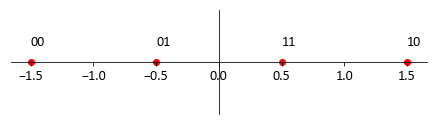

In [116]:
figsize_1 = (16/2.54, 10/2.54)
_, table_symbols = symbol_mapper_mpam([], M)
fig = plt.figure(figsize = np.array(figsize_1) * np.array([1,0.5]))
ax1 = plt.subplot(1,1,1)
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylim([-1.5,1.5])
plt.yticks([],[])
plt.scatter(table_symbols,np.zeros(table_symbols.shape), color="red")
for k in range(table_symbols.shape[0]):
    plt.text(table_symbols[k], 0.5, f"{gray_code[k]}")
#plt.grid()
plt.tight_layout()
plt.savefig("pam_digital_constellation", dpi=300)
plt.show()

In [78]:
b_coded,_ = gray_code_mapper(b, M)
symbols, _ = symbol_mapper_mpam(b_coded, M)
t_symbols = np.arange(0, symbols.shape[0]) * T_s

In [79]:
display(f"Bits:{b.tolist()}")
display(f"Bits Coded:{b_coded.tolist()}")
display(f"Symbols:{symbols.tolist()}")
display(f"Symbol Times:{t_symbols}")

'Bits:[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]'

"Bits Coded:['11', '00', '01', '00', '11', '01', '00', '11', '11', '01']"

'Symbols:[1.5, -1.5, -0.5, -1.5, 1.5, -0.5, -1.5, 1.5, 1.5, -0.5]'

'Symbol Times:[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]'

# Ideal PAM
Since this notebook is executed on a computer, no true continuous-time signal is generated. Instead, we use a sufficiently large sampling rate f_s to represent continuous-time signals. The transformation from discrete-time (symbols) to continuous-time (ideal PAM) thus corresponds to an upsampling of the symbol sequence.

In a first step, compute the upsamling factor N_up between simulation sampling rate f_sim = 1/T_sim and symbol rate f_s = 1/T_s.

In [90]:

N_up = round(T_s / T_sim)
display("Upsampling factor is {}".format(N_up))

figsize_1 = (16/2.54, 10/2.54)

'Upsampling factor is 10'

Processing of this notebook relies on an integer ration between simulation sampling rate and symbol rate. Hence ensure that we have an integer ratio (zero remainder of division); if not, raise an exception.

In [91]:
if (T_s % T_sim) != 0:
    raise ArithmeticError("Non-integer ration of symbol and sampling rate")

In [92]:
sig_pam_ideal = np.concatenate([np.atleast_2d(symbols), np.zeros((N_up-1, symbols.shape[0]))]).flatten('F')
t_ideal = np.arange(0, len(sig_pam_ideal) * T_sim, T_sim)

In [93]:
sig_pam_ideal


array([ 1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1.5,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1.5,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.5,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. , -1.5,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

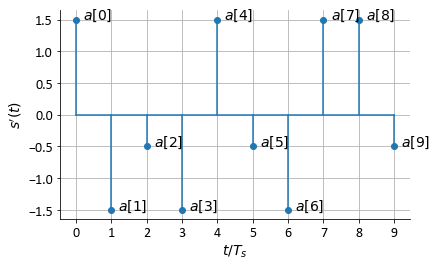

In [94]:

fig = plt.figure()
fig.set_size_inches(figsize_1)
ax = plt.subplot(1,1,1)
markerline, stemlines, baseline = ax.stem(t_symbols/T_s, symbols)
plt.setp(baseline, "color", markerline.get_color())
for l in range(symbols.shape[0]):
    plt.text(t_symbols[l]/T_s+0.2, symbols[l], f"$a[{l}]$")
plt.xlabel('$t/T_s$')
plt.ylabel("$s'(t)$")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(t_symbols/T_s, (t_symbols/T_s).astype('int'))
#plt.xlim([0,t_symbols[-1]])
plt.grid()
fig.tight_layout()
plt.savefig('pam_digital_ideal', dpi = 300)
plt.show()

In [95]:
t_g_t = np.arange(-3*T_s, 3*T_s, T_sim)
#display(t_g_t)

In [96]:
def raised_cosine(t, T_s, alpha):
    g_t = np.zeros(t.shape)
    denominator = (1-(4*alpha**2*t**2/T_s**2))
    g_t[denominator != 0] = np.sinc(t[denominator != 0]/T_s) * np.cos(np.pi*alpha*t[denominator != 0]/T_s) / denominator[denominator != 0]
    g_t[denominator == 0] = np.sinc(t[denominator == 0]/T_s)
    return g_t

In [97]:
alpha = 0.8
g_t = raised_cosine(t_g_t, T_s, alpha)

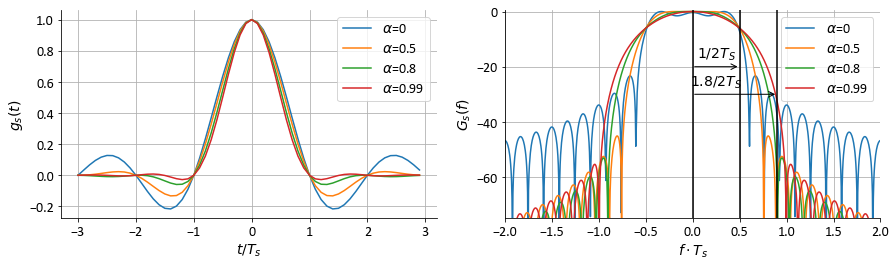

In [98]:
# define the different settings for alpha
alphas = [0,0.5,0.8,0.99]

# create the figure
fig = plt.figure(figsize = np.array(figsize_1)*np.array([2,1]))

# create axes for time-domain plot
ax = plt.subplot(1,2,1)
for alpha in alphas:
    g_t_current = raised_cosine(t_g_t, T_s, alpha)
    plt.plot(t_g_t/T_s, g_t_current, label=f'$\\alpha$={alpha}')
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("$t/T_s$")
plt.ylabel("$g_s(t)$")
plt.grid()
plt.legend()

# create axes for spectrum plot
ax = plt.subplot(1,2,2)
for alpha in alphas:
    g_t_current = raised_cosine(t_g_t, T_s, alpha)
    G_t_current = np.fft.fft(g_t_current, 2048)
    freqs_G_t_current = np.fft.fftfreq(G_t_current.shape[0], T_sim)
    plt.plot(np.fft.fftshift(freqs_G_t_current/f_s), np.fft.fftshift(20*np.log10(np.abs(G_t_current)/np.max(np.abs(G_t_current)))), label=f'$\\alpha$={alpha}')

vlines = []
vlines.append(ax.axvline(0))
vlines.append(ax.axvline(1/T_s/2/f_s))
vlines.append(ax.axvline(1.8/T_s/2/f_s))
for vline in vlines:
    vline.set_color('black')
    vline.set_linestyle('-')
ax.annotate("", xy=(0, -20), xytext=(1/T_s/2/f_s, -20), arrowprops=dict(arrowstyle="<-"))
plt.text(1/T_s/2/f_s/2,-17,"$1/2T_{S}$", horizontalalignment="center")
ax.annotate("", xy=(0, -30), xytext=(1.8/T_s/2/f_s, -30), arrowprops=dict(arrowstyle="<-"))
plt.text(1/T_s/2/f_s/2,-27,"$1.8/2T_{S}$", horizontalalignment="center")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("$f \cdot T_s$")
plt.ylabel("$G_s(f)$")
plt.xlim([-2/T_s/f_s, 2/T_s/f_s])
plt.ylim([-75, 0.5])
plt.grid()
plt.legend()

fig.tight_layout()
plt.savefig("pam_digital_g_t", dpi=300)
plt.show()


# PAM With Impulse Shaping
Generate PAM with impulse shaping by convolution

In [99]:
sig_pam_filtered = np.convolve(sig_pam_ideal, g_t)[round(len(g_t)/2):-round(len(g_t)/2)+1]
# time vector for the shifted copies
t_g_t_copies = np.arange(np.min(t_g_t), len(symbols)*N_up+np.max(t_g_t), T_sim)
# init array with number of rows corresponding to time vector length and number of columns corresponding to number of symbols
sig_pam_g_t_copies = np.zeros((t_g_t_copies.shape[0], symbols.shape[0]))
# find the center index of the transmit impulse (necessary to place impulse exactly on symbol)
idx_g_t_center = np.argwhere(t_g_t == 0)[0][0]
# process all symbols
for k in range(symbols.shape[0]):
    # find current symbol time (index) in time vector
    idx_current_symbol = np.argwhere(t_g_t_copies == k*T_s)[0][0]
    # index where to start copy transmit impulse into output array
    idx_start = idx_current_symbol - idx_g_t_center
    # index where to and copy transmit impulse into output array
    idx_end = idx_start + len(g_t)
    # copy weighted transmit inpulse into current column of output array at symbol position
    sig_pam_g_t_copies[idx_start:idx_end, k] = g_t * symbols[k]

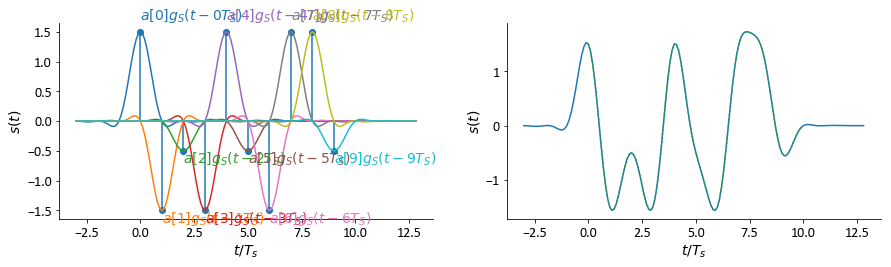

In [135]:
fig = plt.figure()
fig.set_size_inches(np.array(figsize_1) * np.array([2,1]) )

ax = plt.subplot(1,2,1)
markerline, stemlines, baseline = ax.stem(t_symbols/T_s, symbols)
plt.setp(baseline, "color", markerline.get_color())
plt.plot(t_g_t_copies/T_s, sig_pam_g_t_copies)
for l in range(symbols.shape[0]):
    plt.text(t_symbols[l]/T_s, symbols[l]+0.2*np.sign(symbols[l]), f"$a[{l}]g_S(t-{l}T_S)$", color=f"C{l}")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.grid("both")
plt.xlabel("$t/T_s$")
plt.ylabel("$s(t)$")

ax = plt.subplot(1,2,2)
plt.plot(t_g_t_copies/T_s,np.sum(sig_pam_g_t_copies, axis=1), '-')
plt.plot(t_ideal/T_s, sig_pam_filtered, 'C2:')
#plt.plot(t_ideal, sig_pam_ideal)
#plt.grid()
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.grid("both")
plt.xlabel("$t/T_s$")
plt.ylabel("$s(t)$")
plt.tight_layout()
plt.savefig("pam_digital_real", dpi=300)
plt.show()

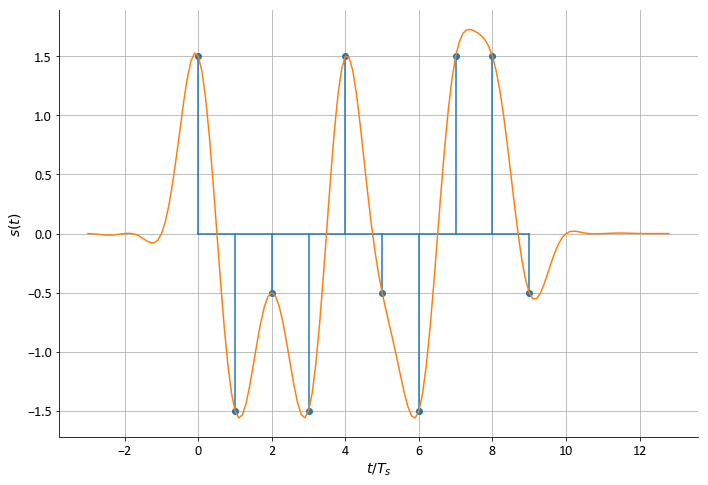

In [153]:
fig = plt.figure()
fig.set_size_inches(np.array(figsize_1) * np.array([4,2]) )
ax = plt.subplot(1,2,1)
markerline, stemlines, baseline = ax.stem(t_symbols/T_s, symbols)
plt.setp(baseline, "color", markerline.get_color())

#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid()
plt.xlabel("$t/T_s$")
plt.ylabel("$s(t)$")

lines = plt.plot(t_g_t_copies/T_s,sig_pam_g_t_copies)
labels = []
for l in range(symbols.shape[0]):
    labels.append(plt.text(t_symbols[l]/T_s, symbols[l]+0.2*np.sign(symbols[l]), f"$a[{l}]g_S(t-{l}T_S)$", color=f"C{l}"))


ims = []

ims.append([])

for l in range(symbols.shape[0]):
    ims.append([*lines[:l+1], labels[l]])
    
ims.append((plt.plot(t_g_t_copies/T_s,np.sum(sig_pam_g_t_copies, axis=1),'C1')))

im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000, blit=True)
HTML(im_ani.to_jshtml(fps=1))

In [101]:
G_t = np.fft.fft(g_t, 2**12)
freqs_G_t = np.fft.fftfreq(G_t.shape[0], T_sim)

In [102]:
b_very_long,_ = gray_code_mapper(np.random.randint(0,2,2**18), M)
symbols_very_long, _ = symbol_mapper_mpam(b_very_long, M)
sig_pam_ideal_very_long = np.concatenate([np.atleast_2d(symbols_very_long), np.zeros((N_up-1, symbols_very_long.shape[0]))]).flatten('F')
sig_pam_filtered_very_long = np.convolve(sig_pam_ideal_very_long, g_t)[round(len(g_t)/2):-round(len(g_t)/2)+1]

In [103]:
b_very_long_corr,_ = gray_code_mapper(np.repeat(np.random.randint(0,2,2**10),2**8), M)
symbols_very_long_corr, _ = symbol_mapper_mpam(b_very_long_corr, M)
sig_pam_ideal_very_long_corr = np.concatenate([np.atleast_2d(symbols_very_long_corr), np.zeros((N_up-1, symbols_very_long_corr.shape[0]))]).flatten('F')
sig_pam_filtered_very_long_corr = np.convolve(sig_pam_ideal_very_long_corr, g_t)[round(len(g_t)/2):-round(len(g_t)/2)+1]

In [104]:
S_t = np.fft.fft(sig_pam_filtered_very_long)
S_t_corr = np.fft.fft(sig_pam_filtered_very_long_corr)
freqs_S_t = np.fft.fftfreq(S_t.shape[0], T_sim)

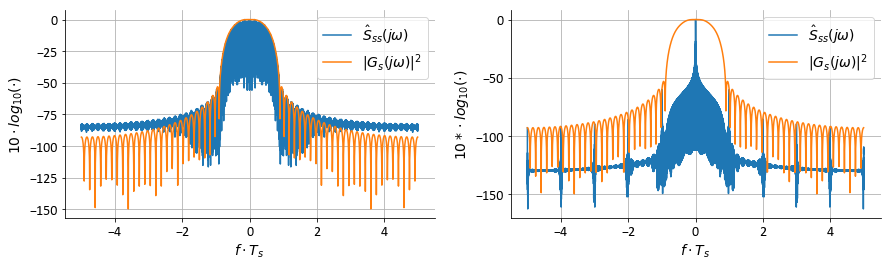

In [105]:
fig = plt.figure(figsize=np.array(figsize_1)*np.array([2,1]))

ax1 = plt.subplot(1,2,1)
plt2 = plt.plot(np.fft.fftshift(freqs_S_t*T_s), np.fft.fftshift(10*np.log10(np.abs(S_t)**2/np.max(np.abs(S_t)**2))), label="$\hat{S}_{ss}(j\omega)$")
plt1 = plt.plot(np.fft.fftshift(freqs_G_t*T_s), np.fft.fftshift(10*np.log10(np.abs(G_t)**2/np.max(np.abs(G_t)**2))), label="$|G_s(j\omega)|^2$")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel("$f \cdot T_s$")
plt.ylabel("$10 \cdot log_{10}(\cdot)$")

ax2 = plt.subplot(1,2,2)
plt2 = plt.plot(np.fft.fftshift(freqs_S_t*T_s), np.fft.fftshift(10*np.log10(np.abs(S_t_corr)**2/np.max(np.abs(S_t_corr)**2))), label="$\hat{S}_{ss}(j\omega)$")
plt1 = plt.plot(np.fft.fftshift(freqs_G_t*T_s), np.fft.fftshift(10*np.log10(np.abs(G_t)**2/np.max(np.abs(G_t)**2))), label="$|G_s(j\omega)|^2$")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.grid()
plt.legend(loc='upper right')
plt.xlabel("$f \cdot T_s$")
plt.ylabel("$10* \cdot log_{10}(\cdot)$")
plt.tight_layout()
plt.savefig("pam_digital_spectrum", dpi=300)
plt.show()


# Generating Passband Signals
Define carrier frequency to use for passband transmission; by defining the carrier frequency relative to the simulation sampling frequency f_s, we can ensure that the relative position of the carrier withing the specturm plots remains identical also when the sampling frequency is changed.

In [233]:
f_c = 0.2 * f_sim
#f_c = 20 * f_sim
g_t_pb = g_t*np.cos(2*np.pi*f_c*t_g_t)
G_t_pb = np.fft.fft(g_t_pb, 2**12)
freqs_G_t_pb = np.fft.fftfreq(G_t.shape[0], T_sim)

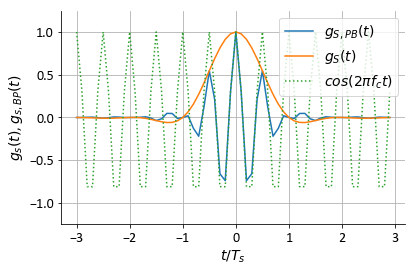

In [234]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(t_g_t/T_s, g_t_pb, label="$g_{S,PB}(t)$")
plt.plot(t_g_t/T_s, g_t, label="$g_{S}(t)$")
plt.plot(t_g_t/T_s, np.cos(2*np.pi*f_c*t_g_t), ':', label="$cos(2 \\pi f_c t)$")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim([-1.25,1.25])
plt.xlabel("$t/T_s$")
plt.ylabel("$g_s(t)$, $g_{s,BP}(t)$")
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.savefig("pam_digital_g_t_passband", dpi=300)
plt.show()

In [108]:
sig_pam_ideal_very_long_pb = np.concatenate([np.atleast_2d(symbols_very_long), np.zeros((N_up-1, symbols_very_long.shape[0]))]).flatten('F')
sig_pam_filtered_very_long_pb = np.convolve(sig_pam_ideal_very_long, g_t_pb)[round(len(g_t_pb)/2):-round(len(g_t_pb)/2)+1]
S_t_pb = np.fft.fft(sig_pam_filtered_very_long_pb)

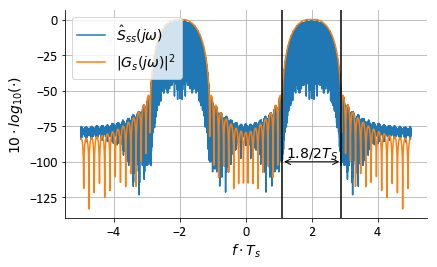

In [109]:
fig = plt.figure(figsize=np.array(figsize_1)*np.array([1,1]))

ax1 = plt.subplot(1,1,1)
plt2 = plt.plot(np.fft.fftshift(freqs_S_t*T_s), np.fft.fftshift(10*np.log10(np.abs(S_t_pb)**2/np.max(np.abs(S_t_pb)**2))), label="$\hat{S}_{ss}(j\omega)$")
plt1 = plt.plot(np.fft.fftshift(freqs_G_t_pb*T_s), np.fft.fftshift(10*np.log10(np.abs(G_t_pb)**2/np.max(np.abs(G_t_pb)**2))), label="$|G_s(j\omega)|^2$")
#ax.spines['bottom'].set_position('zero')
#ax.spines['left'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel("$f \cdot T_s$")
plt.ylabel("$10 \cdot log_{10}(\cdot)$")

vlines = []
vlines.append(ax1.axvline(f_c*T_s-1.8/2))
vlines.append(ax1.axvline(f_c*T_s+1.8/2))
for vline in vlines:
    vline.set_color('black')
    vline.set_linestyle('-')
ax1.annotate("", xy=(f_c*T_s-1.8/2, -100), xytext=(f_c*T_s+1.8/2, -100), arrowprops=dict(arrowstyle="<->"))
plt.text(f_c*T_s,-97,"$1.8/2T_{S}$", horizontalalignment="center")

fig.tight_layout()
plt.savefig("pam_digital_spectrum_passband", dpi=300)
plt.show()


0

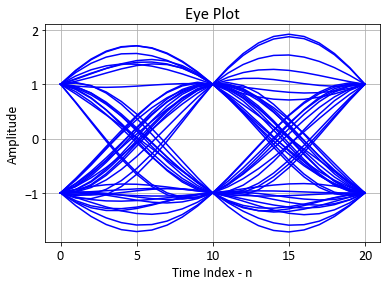

In [110]:
import matplotlib.pyplot as plt
from sk_dsp_comm import sigsys as ss
x,b, data = ss.NRZ_bits(100,10,'rc')
#x,b, data = ss.NRZ_bits(20,2,'rc')
ss.eye_plot(x,20,60)

0

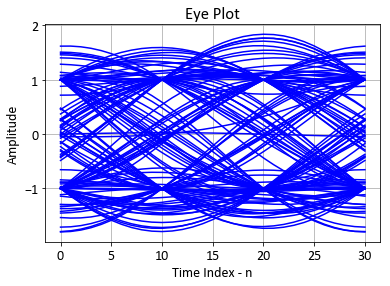

In [111]:
#x,b, data = ss.NRZ_bits(100,10,'rc') chage its parametres to see what hapend when you incrementase the modulation grade
x,b, data = ss.NRZ_bits(200,20,'rc')
#ss.eye_plot(x,50,60)
#ss.eye_plot(x,40,60)
ss.eye_plot(x,30,60)

# quadrature frequency change
## experiment

In [112]:
def mix1(signal1, signal2):
    spec1 = np.fft.fft(signal1)
    spec2 = np.fft.fft(signal2)
    return np.fft.ifft(spec1*spec2)

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


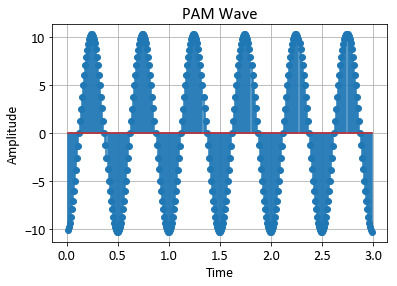

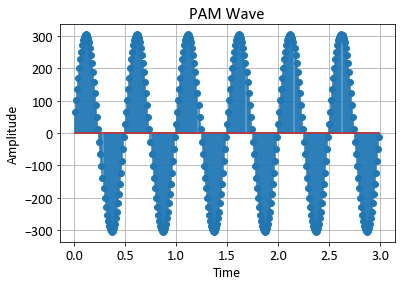

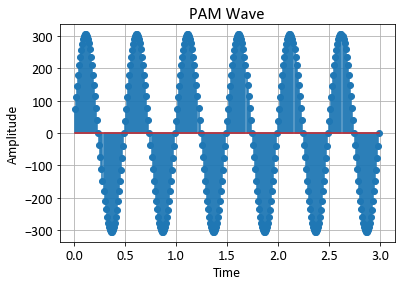

In [113]:
import numpy as np
import matplotlib.pyplot as plt

percent=40.0
TimePeriod=10.0
Cycles=30
dt=0.01

t=np.arange(0,Cycles*TimePeriod,dt); 
pwm= (t%TimePeriod) < (TimePeriod*percent/100)

x=np.linspace(-10,10,len(pwm))
y=(np.sin(x))
x1=np.linspace(-20,20,len(pwm))
y1=(np.square(x1))
a=3
f=2
y[pwm == 0] = 0 
y1[pwm == 0] = 0 
x2 = a*np.sin(2*np.pi*f*t)# %generation of sine wave
x3 = a*np.cos(2*np.pi*f*t)# %generation of sine wave
y2= mix1(y,x2)
y3=mix1(y1,x3)
tx = y3-y2



#for PAM wave plot
plt.stem(t[1:300],y2[1:300]);
plt.title('PAM Wave');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.grid(True)
plt.show()
#for PAM wave plot
plt.stem(t[1:300],y3[1:300]);
plt.title('PAM Wave');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.grid(True)
plt.show()
#for PAM wave plot
plt.stem(t[1:300],tx[1:300]);
plt.title('PAM Wave');
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.grid(True)
plt.show()


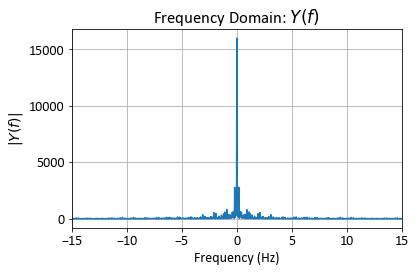

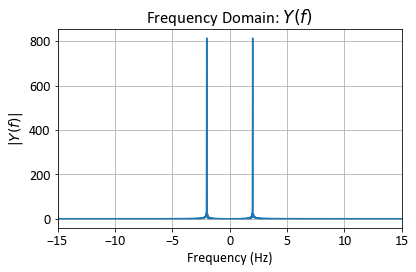

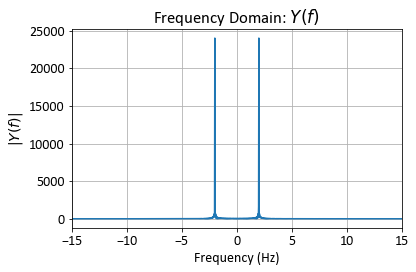

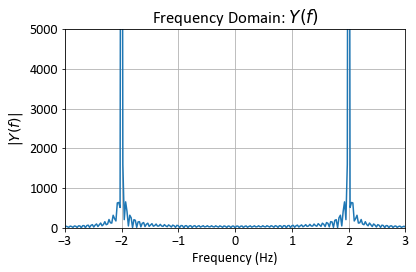

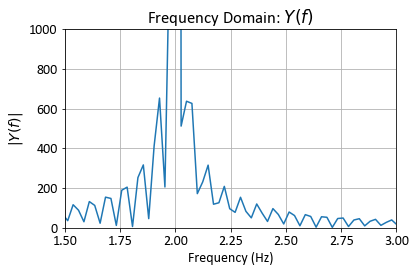

In [119]:
import matplotlib.pyplot as plt
f,Y = ss.ft_approx(y1,t,4096)
plt.figure()
plt.plot(f,abs(Y))
#plot(f,angle(X0))
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
plt.xlim([-15,15])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.tight_layout()
f,Y = ss.ft_approx(y2,t,4096)
plt.figure()
#plt.subplot(212)
plt.plot(f,abs(Y))
#plot(f,angle(X0))
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
plt.xlim([-15,15])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.tight_layout()
f,Y = ss.ft_approx(y3,t,4096)
#plt.subplot(213)
plt.figure()
plt.plot(f,abs(Y))
#plot(f,angle(X0))
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
plt.xlim([-15,15])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.tight_layout()
f,Y = ss.ft_approx(tx,t,4096)
#plt.subplot(214)
plt.figure()
plt.plot(f,abs(Y))
#plot(f,angle(X0))
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
#plt.xlim([-15,15])
plt.xlim([-3,3])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.ylim([0,5000])
plt.tight_layout()
plt.figure()
plt.plot(f,abs(Y))
#plot(f,angle(X0))
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
#plt.xlim([-15,15])
plt.xlim([1.5,3])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.ylim([0,1000])
plt.tight_layout()

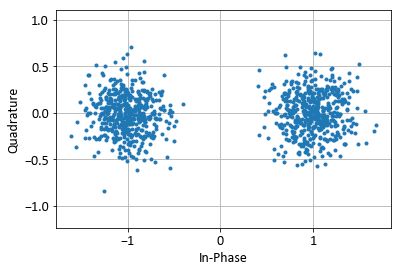

In [143]:
 x,b, data = ss.NRZ_bits(1000,10,'rc')
>>> # Add some noise so points are now scattered about +/-1
>>> y = ss.cpx_AWGN(x,20,10)
>>> yI,yQ = ss.scatter(y,10,60)
>>> plt.plot(yI,yQ,'.')
>>> plt.axis('equal')
>>> plt.ylabel("Quadrature")
>>> plt.xlabel("In-Phase")
>>> plt.grid()
>>> plt.show()

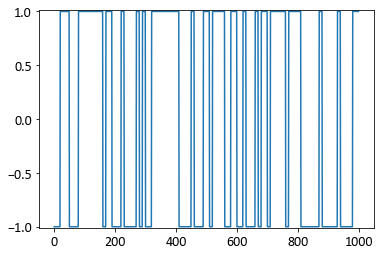

In [145]:
x,b,data = ss.NRZ_bits(100, 10)
t = arange(len(x))
plt.plot(t, x)
plt.ylim([-1.01, 1.01])
plt.show()

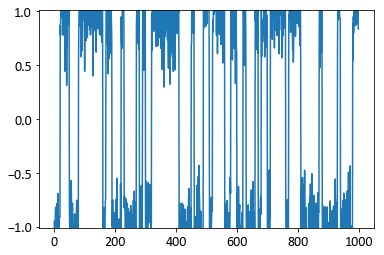

In [146]:
y = ss.cpx_AWGN(x,20,10)
plt.plot(t, y)
plt.ylim([-1.01, 1.01])
plt.show()

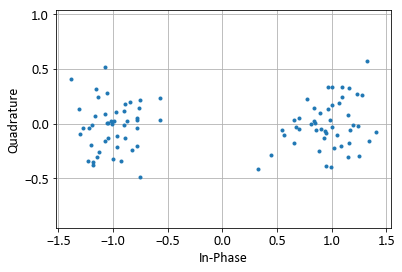

In [147]:
yI,yQ = ss.scatter(y,10,60)
plt.plot(yI,yQ,'.')
plt.axis('equal')
plt.ylabel("Quadrature")
plt.xlabel("In-Phase")
plt.grid()
plt.show()

# Diagrama de constelacion 
#### A constellation diagram is a representation of a signal modulated by a digital modulation scheme such as quadrature amplitude modulation or phase-shift keying. It displays the signal as a two-dimensional xy-plane scatter diagram in the complex plane at symbol sampling instants. The angle of a point, measured counterclockwise from the horizontal axis, represents the phase shift of the carrier wave from a reference phase. The distance of a point from the origin represents a measure of the amplitude or power of the signal.

In a digital modulation system, information is transmitted as a series of samples, each occupying an uniform time slot. During each sample, the carrier wave has a constant amplitude and phase, which is restricted to one of a finite number of values. So each sample encodes one of a finite number of "symbols", which in turn represent one or more binary digits (bits) of information. Each symbol is encoded as a different combination of amplitude and phase of the carrier, so each symbol is represented by a point on the constellation diagram, called a constellation point. The constellation diagram shows all the possible symbols that can be transmitted by the system as a collection of points. In a frequency or phase modulated signal, the signal amplitude is constant, so the points lie on a circle around the origin.

The carrier representing each symbol can be created by adding together different amounts of a cosine wave representing the "I" or in-phase carrier, and a sine wave, shifted by 90° from the I carrier called the "Q" or quadrature carrier. Thus each symbol can be represented by a complex number, and the constellation diagram can be regarded as a complex plane, with the horizontal real axis representing the I component and the vertical imaginary axis representing the Q component. A coherent detector is able to independently demodulate these carriers. This principle of using two independently modulated carriers is the foundation of quadrature modulation. In pure phase modulation, the phase of the modulating symbol is the phase of the carrier itself and this is the best representation of the modulated signal.
![baseband scheme](8qpsk.png)

# interpretation
### The number of constellation points in a diagram gives the size of the "alphabet" of symbols that can be transmitted by each sample, and so determines the number of bits transmitted per sample. It is usually a power of 2. A diagram with four points, for example, represents a modulation scheme that can separately encode all 4 combinations of two bits: 00, 01, 10, and 11 and so can transmit two bits per sample. Thus in general a modulation with {\displaystyle N} N constellation points transmits {\displaystyle \log _{2}N} \log _{2}N bits per sample.
![baseband scheme](16qam.png)

## Diagrama de constelacion 4QPSK

In [148]:
from random import random
from matplotlib import pyplot as plt
import numpy as np

def symbol_modulate(QPSK_symbol):
    # Constellation
    # 00 -> A * exp( j * pi / 4)  = 1 + j
    # 01 -> A * exp( j * 3pi / 4) = -1 + j
    # 11 -> A * exp(-j * 3pi / 4) = -1 - j
    # 10 -> A * exp(-j * pi / 4) = 1 - j

    I_sign = 0
    Q_sign = 0

    if QPSK_symbol[0] == 0:
        Q_sign = 1
    else:
        Q_sign = -1

    if QPSK_symbol[1] == 0:
        I_sign = 1
    else:
        I_sign = -1

    return I_sign, Q_sign

def symbol_demodulate(QPSK_signal):
    # See the constellation in modulation.
    I_data = 0
    Q_data = 0

    if QPSK_signal.real > 0:
        Q_data = 0
    else:
        Q_data = 1

    if QPSK_signal.imag > 0:
        I_data = 0
    else:
        I_data = 1

    return I_data, Q_data

In [149]:
Fs = 8000 # Hz
carrier_frequency = 200
data_size = 10

frequency_step = 1 / Fs
samples = Fs / carrier_frequency * data_size / 2
samples_per_symbol = Fs / carrier_frequency


In [150]:

data = np.arange(data_size)
for n in range(0, data_size):
    if random() > 0.5:
        data[n] = 1
    else:
        data[n] = 0

print(data)

[0 0 1 0 0 0 1 1 0 1]


In [151]:
I_data = np.arange(data_size / 2)
Q_data = np.arange(data_size / 2)


for n in range(0, data_size, 2):
    I_data[int(n / 2)] = data[n]
for n in range(1, data_size, 2):
    Q_data[int(n / 2)] = data[n]

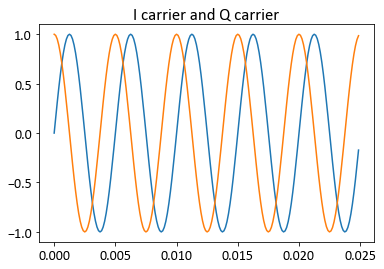

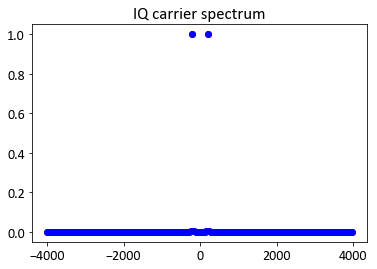

In [152]:
# Generate I/Q carrier
t = np.arange(start = 0, stop = samples * frequency_step, step = frequency_step)
#print t

I_carrier = np.sin(2 * 3.14 * carrier_frequency * t)
Q_carrier = np.cos(2 * 3.14 * carrier_frequency * t)

plt.figure(1)
plt.plot(t, I_carrier, t, Q_carrier)
plt.title('I carrier and Q carrier')
plt.draw()

I_spectrum = np.fft.fft(I_carrier)
Q_spectrum = np.fft.fft(Q_carrier)
freq = np.fft.fftfreq(t.shape[-1], d = frequency_step)

#print freq

plt.figure(2)
plt.plot(freq, np.absolute(I_spectrum) / (samples / 2), 'ro', freq, np.absolute(Q_spectrum) / (samples / 2), 'bo')
plt.title('IQ carrier spectrum')
plt.draw()

I demodulated: [0 1 0 1 0], actual data: [0. 1. 0. 1. 0.]
Q demodulated: [0 0 0 1 1], actual data: [0. 0. 0. 1. 1.]


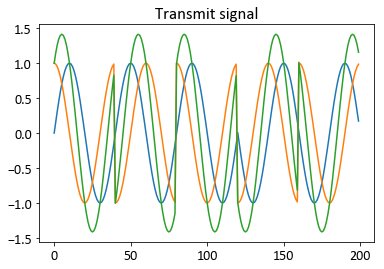

In [154]:
# Modulate carrier with I/Q data
I_modulated = np.arange(samples, dtype=np.float_)
Q_modulated = np.arange(samples, dtype=np.float_)

for n in range(int(data_size / 2)):
    I_sign, Q_sign = symbol_modulate(data[n * 2:n * 2 + 2])
    start = int(n * samples_per_symbol)
    end = int((n + 1) * samples_per_symbol)

    I_modulated[start: end] = I_sign * I_carrier[start: end]
    Q_modulated[start: end] = Q_sign * Q_carrier[start: end]


# Add the I/Q data in time domain
transmit_signal = I_modulated + Q_modulated
plt.figure(3)
plt.plot(np.arange(samples), I_modulated, np.arange(samples), Q_modulated, np.arange(samples), transmit_signal)
plt.title('Transmit signal')
plt.draw()

# Send signal
receive_signal = transmit_signal

# Separate I/Q data and demodulate
I_demodulated = np.arange(len(I_data))
Q_demodulated = np.arange(len(Q_data))

for n in range(len(I_data)):
    start = int(n * samples_per_symbol)
    end = int((n + 1) * samples_per_symbol)

    I_integral = np.sum(receive_signal[start: end] * I_carrier[start: end])
    Q_integral = np.sum(receive_signal[start: end] * Q_carrier[start: end])

    I_demodulated[n], Q_demodulated[n] = symbol_demodulate(np.complex(I_integral, Q_integral))


print(("I demodulated: {}, actual data: {}").format(I_demodulated, I_data))
print(("Q demodulated: {}, actual data: {}").format(Q_demodulated, Q_data))

plt.show()

In [272]:
num_symbols = int(1e2)
int_symbols = np.random.randint(4,  size=num_symbols)
A = np.sqrt(2)
qpsk_symbols = np.zeros(np.size(int_symbols),dtype=complex)
for i in range(1,num_symbols):
    if int_symbols[i]==0:
        qpsk_symbols[i]=(A + (1j*A))
    if int_symbols[i]==1:
        qpsk_symbols[i]=(A - (1j*A))
    if int_symbols[i]==2:
        qpsk_symbols[i]=(- A + (1j*A))
    if int_symbols[i]==3:
        qpsk_symbols[i]=(- A - (1j*A))
tx_sig = qpsk_symbols


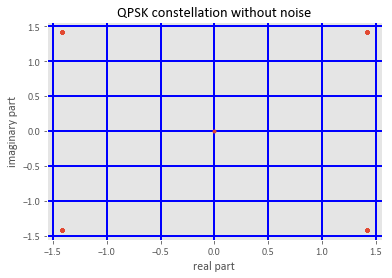

In [326]:
plt.figure()
plt.axes = [-3,-2,-1,0,1,2, 3]
plt.plot(real(qpsk_symbols), imag(qpsk_symbols), '.')
plt.title('QPSK constellation without noise')
plt.xlabel('real part')
plt.ylabel('imaginary part')
grid(b=None, which='both', axis='both')
grid(color='b', linestyle='-', linewidth=2)
plt.show()

Text(0, 0.5, 'imaginary part')

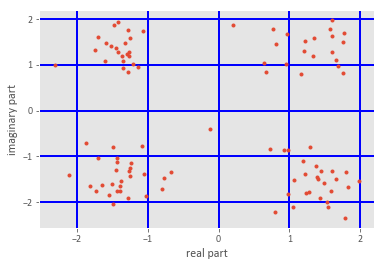

In [322]:
snr = 15 # in dB
#rx_sig = awgn(tx_sig, snr, 'measured');
#rx_sig =ss.cpx_AWGN(tx_sig,20,10)
rx_sig =ss.cpx_AWGN(tx_sig,snr,2)
plt.figure()
#plt.grid()
plot(real(rx_sig), imag(rx_sig), '.')
#plt.scatter(real(rx_sig), imag(rx_sig),color='r', alpha=0.4)
#plt.scatter(rx_sig.real, rx_sig.imag,color='R', alpha=0.44)
grid(b=None, which='both', axis='both')
grid(color='b', linestyle='-', linewidth=2)
xlabel('real part')
ylabel('imaginary part')

In [313]:
#symbol_num = 20
symbol_num = 20
#M = 64
M = 64
sqrt_M = sqrt(M).astype(int)
k = log2(M).astype(int)

In [180]:
data_input = randint(2, size=k*symbol_num)
data_input

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [181]:
vect = array(range(sqrt_M))
gary_constallation = bitwise_xor(vect, floor(vect/2).astype(int))
gary_constallation

array([0, 1, 3, 2, 6, 7, 5, 4], dtype=int32)

In [182]:
vect = arange(1, sqrt(M), 2)
symbols = concatenate((flip(-vect, axis=0), vect)).astype(int)
symbols

array([-7, -5, -3, -1,  1,  3,  5,  7])

In [183]:
data_input = data_input.reshape((-1,k))
data_input

array([[1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 1]])

In [188]:
I = zeros((data_input.shape[0],))
Q = zeros((data_input.shape[0],))
for n in range(int(data_input.shape[1] / 2)):
    I = I + data_input[:,n] * 2 ** n
for n in range(int(data_input.shape[1]/2),int(data_input.shape[1])):
    Q = Q + data_input[:,n] * 2 ** (n - int(data_input.shape[1]/2))

I = I.astype(int)
Q = Q.astype(int)

In [189]:
I = gary_constallation[I]
Q = gary_constallation[Q]
I = symbols[I]
Q = symbols[Q]

S = I + 1j * Q
S

array([-3.-1.j, -1.-7.j,  1.+5.j,  7.-5.j,  5.+5.j,  3.+7.j,  7.-1.j,
        7.-5.j,  5.-7.j,  7.+7.j, -1.+3.j,  1.-3.j, -3.+1.j,  5.+5.j,
       -5.+7.j, -1.+7.j,  7.+3.j, -7.-7.j,  3.+3.j, -1.+1.j])

In [201]:
whos S

No variables match your requested type.


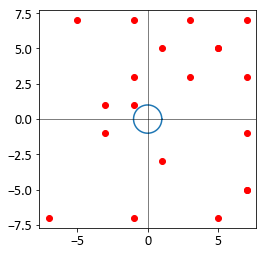

In [202]:
#plot unit circle
t = linspace(0,2*pi,101)
plot(cos(t),sin(t))

#plot data
plot(S.real, S.imag,'ro')

#make box bigger
axes().set_aspect('equal')
m = max(max(abs(S.real)),max(abs(S.imag)))
xlim(-1.1*m,1.1*m),ylim(-1.1*m,1.1*m)

#draw horizontal and vertical axes
plot([0,0],[-1.1*m,1.1*m],'k',linewidth=0.5)
plot([-1.1*m,1.1*m],[0,0],'k',linewidth=0.5)

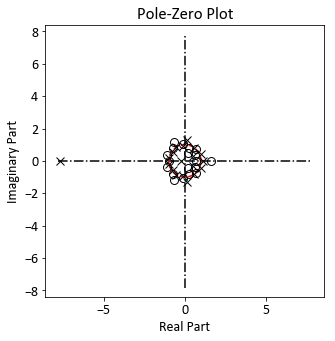

In [196]:
ss.zplane(I, Q)
plt.axis('equal')
plt.show()

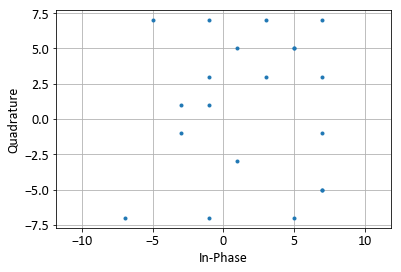

In [194]:
plt.plot(I,Q,'.')
plt.axis('equal')
plt.ylabel("Quadrature")
plt.xlabel("In-Phase")
plt.grid()
plt.show()

In [115]:
from ipywidgets import interact, interactive
from scipy import signal
def pulses_plot(D1,D2,W1,W2):
    t = arange(-5,5,.01)
    x_rect = ss.rect(t-D1,W1)
    x_tri = ss.tri(t-D2,W2)
    subplot(211)
    plot(t,x_rect)
    grid()
    ylabel(r'$\Pi((t-3)/2)$');
    subplot(212)
    plot(t,x_tri)
    grid()
    xlabel(r'Time (s)')
    ylabel(r'$\Lambda((t+2)/1.5)$');
    tight_layout()

interactive_plot = interactive(pulses_plot,D1 = (-3,3,.5), D2 = (-3,3,.5), W1 = (0.5,2,.25), W2 = (0.5,2,.25));
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='D1', max=3.0, min=-3.0, step=0.5), FloatSlider(value…

In [41]:
n

31